# 1. Q-GIS 활용을 위한 전처리

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[10,5]

In [2]:
os.chdir(r'C:\Users\user\Desktop\해심원')

In [3]:
df = pd.read_csv('해양수산부 중앙해양안전심판원_해양사고 통계현황_20200331.csv')
df.head(2)

,사건번호,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,선박명,선박중요도,선박톤수,톤수범위(통계용),선박용도(통계용),사망합계(선원+여객+기타),실종합계(선원+여객+기타),인명피해합계(사망+실종),부상합계(선원+여객+기타),총합(사망+실종+부상)
0,IC-2016-0189,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,...,거북호,1,0.0,미상,수상레저기구,0,0,0,0,0
1,IC-2016-0116,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,봄,...,선명미상,2,0.0,미상,어선,0,0,0,0,0


## 1.1 위경도 형태로의 변환

### 1.1.1 '도-분-초' 형태로 데이터 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   사건번호            15208 non-null  object 
 1   사건명             15208 non-null  object 
 2   해양사고종류(통계용)     15208 non-null  object 
 3   해양사고발생(년도)      15208 non-null  int64  
 4   해양사고발생(월)       15208 non-null  int64  
 5   해양사고발생(일)       15208 non-null  int64  
 6   해양사고발생(시)       15208 non-null  int64  
 7   해양사고발생(분)       15208 non-null  int64  
 8   해양사고발생시간대       15208 non-null  object 
 9   계절              15208 non-null  object 
 10  해양사고장소(위)       15208 non-null  object 
 11  해양사고장소(위도)      15208 non-null  object 
 12  해양사고장소(위분)      15208 non-null  int64  
 13  해양사고장소(위초)      15208 non-null  int64  
 14  해양사고장소(경)       15208 non-null  object 
 15  해양사고장소(경도)      15208 non-null  object 
 16  해양사고장소(경분)      15208 non-null  int64  
 17  해양사고장소(경초)      15208 non-null 

In [5]:
df.columns

Index(['사건번호', '사건명', '해양사고종류(통계용)', '해양사고발생(년도)', '해양사고발생(월)', '해양사고발생(일)',
       '해양사고발생(시)', '해양사고발생(분)', '해양사고발생시간대', '계절', '해양사고장소(위)', '해양사고장소(위도)',
       '해양사고장소(위분)', '해양사고장소(위초)', '해양사고장소(경)', '해양사고장소(경도)', '해양사고장소(경분)',
       '해양사고장소(경초)', '해양사고발생지역(대)', '해양사고발생지역(중)', '해양사고발생지역(통계용)', '선박명',
       '선박중요도', '선박톤수', '톤수범위(통계용)', '선박용도(통계용)', '사망합계(선원+여객+기타)',
       '실종합계(선원+여객+기타)', '인명피해합계(사망+실종)', '부상합계(선원+여객+기타)', '총합(사망+실종+부상)'],
      dtype='object')

In [6]:
loc_df = df[['해양사고장소(위)', '해양사고장소(위도)',
       '해양사고장소(위분)', '해양사고장소(위초)', '해양사고장소(경)', '해양사고장소(경도)', '해양사고장소(경분)',
       '해양사고장소(경초)']]
loc_df

,해양사고장소(위),해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)
0,북,NN36,41,0,동,동E126,7,0
1,북,NN30,51,0,동,동E126,58,0
2,북,NN34,53,6,동,동E126,23,13
3,북,NN37,6,15,동,동E126,40,48
4,북,NN36,24,40,동,동E126,21,18
...,...,...,...,...,...,...,...,...
15203,북,NN29,17,0,동,동E125,35,0
15204,북,NN35,2,5,동,동E129,4,58
15205,북,NN35,5,7,동,동E129,0,14
15206,북,N35,3,54,동,E129,0,41


In [7]:
df['해양사고장소(위도)'].value_counts()

N34     3257
N35     2113
NN34    1702
N36     1383
N37     1330
        ... 
N07        1
S07        1
NN05       1
SS35       1
SS49       1
Name: 해양사고장소(위도), Length: 63, dtype: int64

In [8]:
#남반구해역 사고도 존재...?
#구글지도에 정확한 위치 확인 위해 검토
    #확인결과 해외에서 발생하였더라도 한국국적 선원이 탑승하면 관할 해양안전심판원에서 조사/재결하고 이러한 이유로 사고현황데이터에 존재 가능(오타X)

df[df['해양사고장소(위도)'].str.contains('62')][['사건번호','사건명','해양사고장소(위)', '해양사고장소(위도)',
       '해양사고장소(위분)', '해양사고장소(위초)', '해양사고장소(경)', '해양사고장소(경도)', '해양사고장소(경분)',
       '해양사고장소(경초)']]

,사건번호,사건명,해양사고장소(위),해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)
15127,DH-2018-0105,어선 서던오션호 선원사망사건,남,SS62,59,52,서,WW157,6,7


In [9]:
loc_df['해양사고장소(위도)'] = loc_df['해양사고장소(위도)'].str[-2:]
loc_df.head()

<ipython-input-9-11e763a0d575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['해양사고장소(위도)'] = loc_df['해양사고장소(위도)'].str[-2:]


,해양사고장소(위),해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)
0,북,36,41,0,동,동E126,7,0
1,북,30,51,0,동,동E126,58,0
2,북,34,53,6,동,동E126,23,13
3,북,37,6,15,동,동E126,40,48
4,북,36,24,40,동,동E126,21,18


In [10]:
loc_df['해양사고장소(위분)'].unique()  #정상적으로 두자리 숫자인것을 확인

array([41, 51, 53,  6, 24, 37, 13,  2, 57, 30,  9,  7,  0,  5, 25, 50, 44,
       17, 33, 46, 55, 31, 59, 28, 27,  1,  8, 38, 48, 16,  4, 15, 40, 45,
       49, 35, 19, 36, 11, 42, 29, 58, 39, 34, 23, 47, 18, 56, 22, 26, 52,
       43, 10, 12, 54, 20, 32, 14, 21,  3, 93], dtype=int64)

In [11]:
loc_df['해양사고장소(경도)'].unique()  #뒷자리 3개만 추출하면 될듯

array(['동E126', '동E129', '동E128', 'E127', 'E129', 'E126', '동E127', 'E128',
       'E125', '동E125', 'E124', 'E000', 'E088', 'E123', '동E123', 'E130',
       'W128', '동E130', 'WW126', 'E218', 'E172', 'E136', '동E124', '동E103',
       '동E131', '동E132', '동E153', 'W129', 'WW053', 'E131', 'E122', 'E133',
       '동E000', 'E139', '동E429', 'E132', 'E012', '동E133', '동E110',
       '동E119', '동E121', '동E122', '동E135', 'E140', '동E075', 'E141',
       'E134', 'E135', '동E134', 'E119', 'E118', 'E105', 'W125', 'E117',
       '동E113', '동E099', 'E097', 'W081', 'W056', 'E150', '동E154', 'E056',
       'E035', 'W175', 'WW157', 'W041', 'W023', 'E103', 'WW018', 'W043',
       'E158', 'E147', 'WW000', 'WW004', 'W036', '동E017', 'W164'],
      dtype=object)

In [12]:
loc_df['해양사고장소(경도)'] = loc_df['해양사고장소(경도)'].str[-3:]
loc_df.head()

<ipython-input-12-ce0c81893044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['해양사고장소(경도)'] = loc_df['해양사고장소(경도)'].str[-3:]


,해양사고장소(위),해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)
0,북,36,41,0,동,126,7,0
1,북,30,51,0,동,126,58,0
2,북,34,53,6,동,126,23,13
3,북,37,6,15,동,126,40,48
4,북,36,24,40,동,126,21,18


In [13]:
loc_df[loc_df['해양사고장소(위도)'].isna()]  #컬럼 전체 NA값 없음을 확인

,해양사고장소(위),해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)


In [14]:
loc_df.drop(['해양사고장소(위)', '해양사고장소(경)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
loc_df.head(2)

,해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초)
0,36,41,0,126,7,0
1,30,51,0,126,58,0


### 1.1.2 도분초를 위경도로 변환

In [16]:
loc_df.info()  #기존의 문자열때문에 일부 object타입의 컬럼 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   해양사고장소(위도)  15208 non-null  object
 1   해양사고장소(위분)  15208 non-null  int64 
 2   해양사고장소(위초)  15208 non-null  int64 
 3   해양사고장소(경도)  15208 non-null  object
 4   해양사고장소(경분)  15208 non-null  int64 
 5   해양사고장소(경초)  15208 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 713.0+ KB


In [17]:
loc_df = loc_df.astype('int')

In [18]:
loc_df['위도'] = loc_df['해양사고장소(위도)'] + loc_df['해양사고장소(위분)']/60 + loc_df['해양사고장소(위초)']/3600
loc_df['경도'] = loc_df['해양사고장소(경도)'] + loc_df['해양사고장소(경분)']/60 + loc_df['해양사고장소(경초)']/3600  #위경도 변환 공식

In [19]:
loc_df

,해양사고장소(위도),해양사고장소(위분),해양사고장소(위초),해양사고장소(경도),해양사고장소(경분),해양사고장소(경초),위도,경도
0,36,41,0,126,7,0,36.683333,126.116667
1,30,51,0,126,58,0,30.850000,126.966667
2,34,53,6,126,23,13,34.885000,126.386944
3,37,6,15,126,40,48,37.104167,126.680000
4,36,24,40,126,21,18,36.411111,126.355000
...,...,...,...,...,...,...,...,...
15203,29,17,0,125,35,0,29.283333,125.583333
15204,35,2,5,129,4,58,35.034722,129.082778
15205,35,5,7,129,0,14,35.085278,129.003889
15206,35,3,54,129,0,41,35.065000,129.011389


In [20]:
loc_df = loc_df[['위도', '경도']]
loc_df.head()

,위도,경도
0,36.683333,126.116667
1,30.850000,126.966667
2,34.885000,126.386944
3,37.104167,126.680000
4,36.411111,126.355000


## 1.2 선박용도별 위경도 추출

In [21]:
df.columns

Index(['사건번호', '사건명', '해양사고종류(통계용)', '해양사고발생(년도)', '해양사고발생(월)', '해양사고발생(일)',
       '해양사고발생(시)', '해양사고발생(분)', '해양사고발생시간대', '계절', '해양사고장소(위)', '해양사고장소(위도)',
       '해양사고장소(위분)', '해양사고장소(위초)', '해양사고장소(경)', '해양사고장소(경도)', '해양사고장소(경분)',
       '해양사고장소(경초)', '해양사고발생지역(대)', '해양사고발생지역(중)', '해양사고발생지역(통계용)', '선박명',
       '선박중요도', '선박톤수', '톤수범위(통계용)', '선박용도(통계용)', '사망합계(선원+여객+기타)',
       '실종합계(선원+여객+기타)', '인명피해합계(사망+실종)', '부상합계(선원+여객+기타)', '총합(사망+실종+부상)'],
      dtype='object')

In [22]:
new_df = pd.concat([df['선박용도(통계용)'], df['사건명'],df['해양사고종류(통계용)'],loc_df['위도'], loc_df['경도']], axis=1)
new_df.head()

,선박용도(통계용),사건명,해양사고종류(통계용),위도,경도
0,수상레저기구,레저보트 거북호 침수사건,침수,36.683333,126.116667
1,어선,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,30.850000,126.966667
2,어선,어선 만성호 무등록선박 예천호 충돌사건,충돌,34.885000,126.386944
3,어선,어선 선명무 운항저해사건,운항저해,37.104167,126.680000
4,수상레저기구,레저보트 서해킹호 기관손상사건,기관손상,36.411111,126.355000


In [23]:
new_df['선박용도(통계용)'].unique()

array(['수상레저기구', '어선', '기타선', '여객선', '화물선', '유조선', '예인선'], dtype=object)

In [24]:
new_df[new_df['선박용도(통계용)'].str.contains('레저')]

,선박용도(통계용),사건명,해양사고종류(통계용),위도,경도
0,수상레저기구,레저보트 거북호 침수사건,침수,36.683333,126.116667
4,수상레저기구,레저보트 서해킹호 기관손상사건,기관손상,36.411111,126.355000
5,수상레저기구,레저보트 선명무 운항저해사건,운항저해,36.623333,126.240556
10,수상레저기구,모터보트 진또배기 운항저해사건,운항저해,36.153056,129.402222
20,수상레저기구,레저보트 제일호 운항저해사건,운항저해,37.295278,126.526944
...,...,...,...,...,...
14773,수상레저기구,어선 광영호/고무보트 해당호 충돌사건,충돌,34.491111,127.150000
14835,수상레저기구,낚시어선 희망호/모터보트 몽돌바당호 충돌사건,충돌,33.558889,126.407778
14927,수상레저기구,어선 207우진호/모터보트 서진호 충돌사건,충돌,33.486389,126.968611
15033,수상레저기구,낚시어선 추자피싱2호/모터보트 진명2호 충돌사건,충돌,33.939167,126.306111


In [25]:
#new_df[new_df['선박용도(통계용)'].str.contains('레저')].to_csv('레저기구_loc.csv', index=False, encoding='utf-8-sig')
#new_df[new_df['선박용도(통계용)'].str.contains('어선')].to_csv('어선_loc.csv', index=False, encoding='utf-8-sig')
#new_df[new_df['선박용도(통계용)'].str.contains('기타')].to_csv('기타선_loc.csv', index=False, encoding='utf-8-sig')
#new_df[new_df['선박용도(통계용)'].str.contains('여객선')].to_csv('여객선_loc.csv', index=False, encoding='utf-8-sig')
#new_df[new_df['선박용도(통계용)'].str.contains('화물')].to_csv('화물선_loc.csv', index=False, encoding='utf-8-sig')
#new_df[new_df['선박용도(통계용)'].str.contains('유조')].to_csv('유조선_loc.csv', index=False, encoding='utf-8-sig')

## 1.3. 충돌사건 추출

In [26]:
clash_df = new_df[new_df['해양사고종류(통계용)'].str.contains('충돌')]
clash_df

,선박용도(통계용),사건명,해양사고종류(통계용),위도,경도
1,어선,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,30.850000,126.966667
2,어선,어선 만성호 무등록선박 예천호 충돌사건,충돌,34.885000,126.386944
8,어선,어선 태양호선명미상 무등록부선 충돌사건,충돌,34.950000,126.255556
9,어선,석유제품운반선 아전트선라이즈.어선 제링유26938 충돌사건,충돌,32.500000,126.783333
11,기타선,어선 제35불로호선명미상 바지선 충돌사건,충돌,35.120278,128.681667
...,...,...,...,...,...
15200,화물선,컨테이너선 엠에스씨 린(MSC LEANNE) · 컨테이너선 그레이트(GREAT) 충돌사건,충돌,35.077500,128.814722
15201,화물선,일반화물선 머큐리트라이엄프.시운전선 NE232 충돌사건,충돌,32.433889,126.951389
15202,예인선,"액체화학품산적운반선 그레이스 삼부호, 예선 창 강 투오8 하오 충돌사건",충돌,31.761667,121.031667
15203,화물선,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,29.283333,125.583333


In [27]:
clash_df.drop(columns='해양사고종류(통계용)', axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
clash_df['선박용도(통계용)'].value_counts()

어선        1673
화물선        283
기타선        201
수상레저기구     125
유조선        122
예인선        105
여객선         44
Name: 선박용도(통계용), dtype: int64

In [29]:
#clash_df.to_csv('충돌사건 현황분포.csv', encoding='utf-8-sig', index=False)

## 1.4 사건 전체목록 위경도데이터 만들기

In [30]:
all_df = pd.concat([df['사건명'], df['해양사고종류(통계용)'], loc_df['위도'], loc_df['경도']], axis=1)
all_df

,사건명,해양사고종류(통계용),위도,경도
0,레저보트 거북호 침수사건,침수,36.683333,126.116667
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,30.850000,126.966667
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,34.885000,126.386944
3,어선 선명무 운항저해사건,운항저해,37.104167,126.680000
4,레저보트 서해킹호 기관손상사건,기관손상,36.411111,126.355000
...,...,...,...,...
15203,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,29.283333,125.583333
15204,원양어선 신유한호 해양오염사건,해양오염,35.034722,129.082778
15205,원양어선 카피딴 팰리예브(KAPITAN FALEYEV) 해양오염사건,해양오염,35.085278,129.003889
15206,어선 카피탄마슬로베츠·어획물운반선 헬시8 충돌사건,충돌,35.065000,129.011389


In [31]:
#all_df.to_csv('전체사건.csv', encoding='utf-8-sig', index=False)

# 2. EDA

## 2.1 '인천항만_그리드'와 겹치는 전체사건 종류별 분석

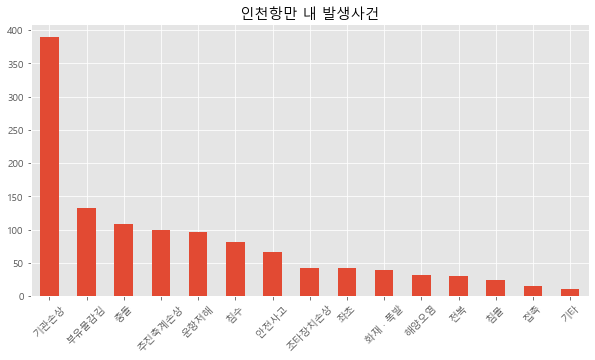

In [32]:
pd.read_csv('인천항만_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('인천항만 내 발생사건')
plt.show()

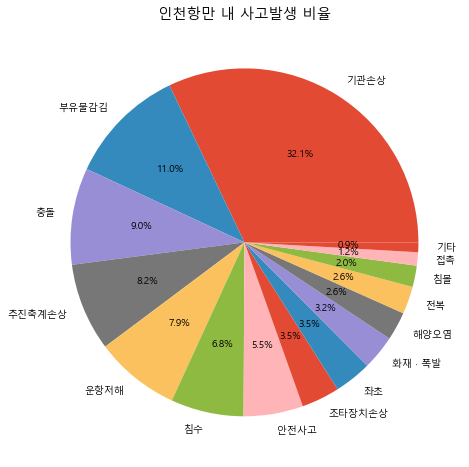

In [33]:
fig = plt.figure(figsize=(8,8))

plt.pie(pd.read_csv('인천항만_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts(),
        labels=pd.read_csv('인천항만_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts().index, autopct='%1.1f%%')
plt.title('인천항만 내 사고발생 비율')
plt.show()

## 2.2 '2019항적도'와 겹치는 전체사건 종류별 분석

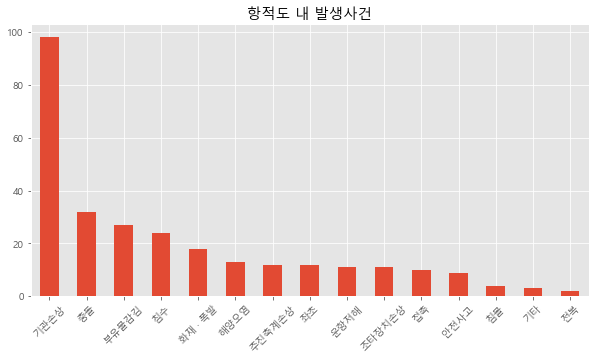

In [34]:
pd.read_csv('항적_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('항적도 내 발생사건')
plt.show()

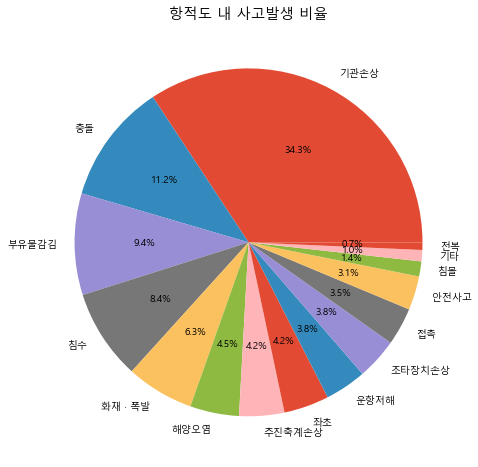

In [35]:
fig = plt.figure(figsize=(8,8))

plt.pie(pd.read_csv('항적_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts(),
        labels=pd.read_csv('항적_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts().index, autopct='%1.1f%%')
plt.title('항적도 내 사고발생 비율')
plt.show()

## 2.3 어선 vs 비어선 사고 발생현황

In [36]:
vsl_df = df[df['선박용도(통계용)']=='어선'].iloc[:,[1,2,3,4,5,6,7]]  #어선
vsl_df.head(2)

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분)
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54


In [37]:
non_vsl = df[df['선박용도(통계용)']!='어선'].iloc[:,[1,2,3,4,5,6,7]]  #비어선
non_vsl.head(2)

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분)
0,레저보트 거북호 침수사건,침수,2016,5,12,15,20
4,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,18,12


Text(0.5, 1.0, '비어선')

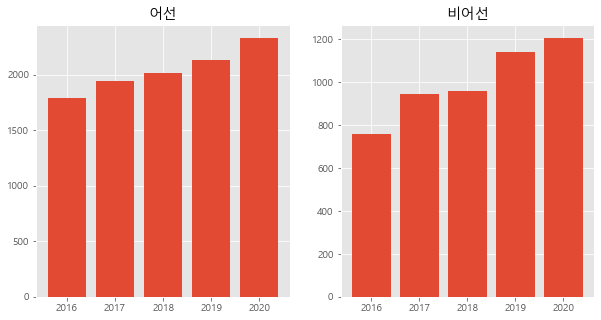

In [38]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.bar(vsl_df['해양사고발생(년도)'].value_counts().sort_index().index, vsl_df['해양사고발생(년도)'].value_counts().sort_index())
plt.title('어선')

plt.subplot(122)
plt.bar(non_vsl['해양사고발생(년도)'].value_counts().sort_index().index, non_vsl['해양사고발생(년도)'].value_counts().sort_index())
plt.title('비어선')

#어선과 비어선 사고발생량의 차이를 느끼기에는 부적합

In [39]:
print(vsl_df['해양사고발생(년도)'].value_counts().values)
print(non_vsl['해양사고발생(년도)'].value_counts().values)

[2331 2134 2013 1939 1794]
[1204 1140  955  943  755]


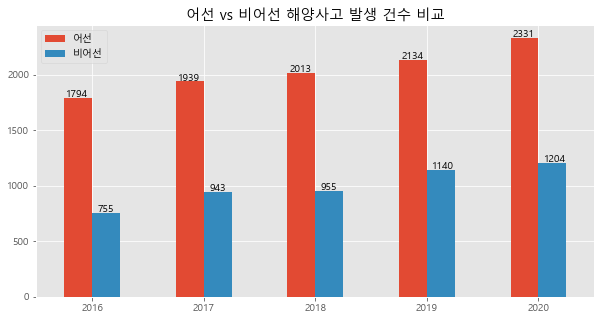

In [99]:
pd.DataFrame({'어선':vsl_df['해양사고발생(년도)'].value_counts().sort_index(),
            '비어선':non_vsl['해양사고발생(년도)'].value_counts().sort_index()}).plot(kind='bar')
plt.xticks(rotation=0)

for i in range(0,5):
    a = vsl_df['해양사고발생(년도)'].value_counts().sort_index().values[i]
    b = non_vsl['해양사고발생(년도)'].value_counts().sort_index().values[i]
    plt.text(i-0.23, a+10, f'{a}', size=10)
    plt.text(i+0.05, b+10, f'{b}', size=10)

    
plt.title('어선 vs 비어선 해양사고 발생 건수 비교')
plt.show()                            

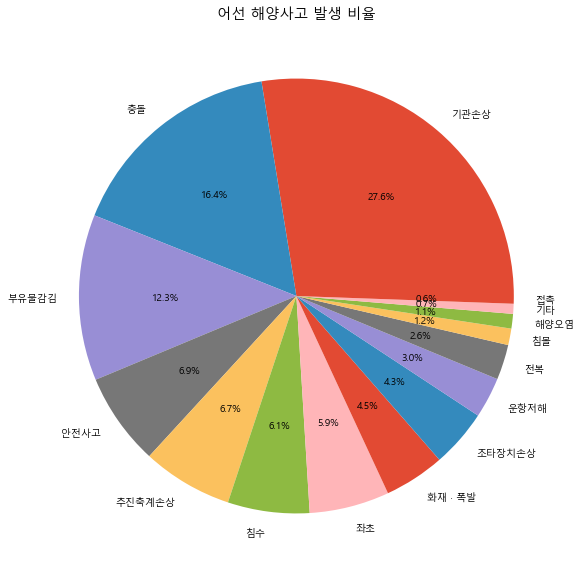

In [96]:
plt.figure(figsize=(7,7))
plt.pie(df[df['선박용도(통계용)'].str.contains('어선')]['해양사고종류(통계용)'].value_counts(), autopct='%1.1f%%',
       labels=df[df['선박용도(통계용)'].str.contains('어선')]['해양사고종류(통계용)'].value_counts().index)
plt.title('어선 해양사고 발생 비율')
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df['선박용도(통계용)'].value_counts(), autopct='%1.1f%%', labels=df['선박용도(통계용)'].value_counts().index)
plt.title('등록 사고선박 비율')

## 2.4 인천항만 충돌사건중 인명피해 현황 도출

In [41]:
df_2 = pd.read_csv('인천항 충돌사건 인명.csv', encoding='euc-kr')
df_2

,선박용도(통계용),사건명,위도,경도
0,수상레저기구,"낚시어선 영진호, 콤비보트 선명무 충돌사건",37.029444,126.584722
1,수상레저기구,"낚시어선 에버그린호, 고무보트 선명무 충돌사건",37.066667,126.550000
2,수상레저기구,"어선 삼화호, 레저보트 루돌프호 충돌사건",37.079444,126.554167
3,수상레저기구,"낚시어선 썬스타호, 모터보트 헌팅호 충돌사건",37.105000,126.333333
4,수상레저기구,"유선 바다여행호, 모터보트 측도호 충돌사건",37.210278,126.475000
...,...,...,...,...
104,유조선,"산적화물선 포멘토 투, 석유제품운반선 하이마 충돌사건",37.055000,126.165000
105,화물선,"자동차운반선 모닝카밀라, 자동차운반선 글로비스콘도르 충돌사건",37.468611,126.589722
106,화물선,"자동차운반선 모닝카밀라, 자동차운반선 글로비스콘도르 충돌사건",37.468611,126.589722
107,화물선,"부선 시온호, 컨테이너선 아브얀 충돌사건",37.339444,126.644722


In [42]:
merged_df = pd.merge(df, df_2, on='사건명', how='inner')
merged_df.drop_duplicates(subset='사건명').to_csv('drop.csv', encoding='utf-8-sig')

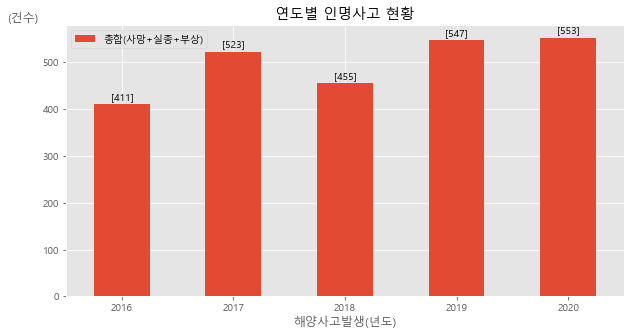

In [43]:
df[['해양사고발생(년도)', '총합(사망+실종+부상)']].groupby('해양사고발생(년도)').sum().plot.bar()
plt.xticks(rotation=0)
plt.title('연도별 인명사고 현황')
plt.ylabel('(건수)', loc='top', rotation=0)

for i in range(0,5):
    text = df[['해양사고발생(년도)', '총합(사망+실종+부상)']].groupby('해양사고발생(년도)').sum().values[i]
    plt.text(i-0.1, text+10, f'{text}', size=10)

plt.show()

In [44]:
df[['해양사고발생(년도)', '총합(사망+실종+부상)']].groupby('해양사고발생(년도)').sum()

,총합(사망+실종+부상)
해양사고발생(년도),
2016,411
2017,523
2018,455
2019,547
2020,553


## 2.5 시계열데이터 전처리 및 시각화

In [45]:
time_df = df.iloc[:,[3,4,5,6,7,8]]
time_df

,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대
0,2016,5,12,15,20,12-16시
1,2016,3,22,0,0,0-4시
2,2016,11,12,20,54,20-24시
3,2017,5,1,6,28,4-8시
4,2016,5,22,18,12,16-20시
...,...,...,...,...,...,...
15203,2017,11,8,14,0,12-16시
15204,2017,5,5,8,33,8-12시
15205,2017,11,9,9,30,8-12시
15206,2019,7,29,11,14,8-12시


In [46]:
time_df = time_df.astype(str)

time_df['해양사고발생시간(월별)'] = time_df['해양사고발생(년도)']+'-'+time_df['해양사고발생(월)']

time_df['해양사고발생시간(일자)'] = time_df['해양사고발생(년도)']+'-'+time_df['해양사고발생(월)']+ '-'+time_df['해양사고발생(일)']

time_df.head()

,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생시간(월별),해양사고발생시간(일자)
0,2016,5,12,15,20,12-16시,2016-5,2016-5-12
1,2016,3,22,0,0,0-4시,2016-3,2016-3-22
2,2016,11,12,20,54,20-24시,2016-11,2016-11-12
3,2017,5,1,6,28,4-8시,2017-5,2017-5-1
4,2016,5,22,18,12,16-20시,2016-5,2016-5-22


In [47]:
time_df['해양사고발생시간(일자)'] = pd.to_datetime(time_df['해양사고발생시간(일자)'], format='%Y-%m-%d')
time_df['해양사고발생시간(월별)'] = pd.to_datetime(time_df['해양사고발생시간(월별)'], format='%Y-%m')

In [48]:
df = df.join(time_df['해양사고발생시간(월별)'])
df = df.join(time_df['해양사고발생시간(일자)'])
df.head(2)

,사건번호,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,선박톤수,톤수범위(통계용),선박용도(통계용),사망합계(선원+여객+기타),실종합계(선원+여객+기타),인명피해합계(사망+실종),부상합계(선원+여객+기타),총합(사망+실종+부상),해양사고발생시간(월별),해양사고발생시간(일자)
0,IC-2016-0189,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,...,0.0,미상,수상레저기구,0,0,0,0,0,2016-05-01,2016-05-12
1,IC-2016-0116,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,봄,...,0.0,미상,어선,0,0,0,0,0,2016-03-01,2016-03-22


In [49]:
df[['사건명', '해양사고발생시간(월별)']]

,사건명,해양사고발생시간(월별)
0,레저보트 거북호 침수사건,2016-05-01
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",2016-03-01
2,어선 만성호 무등록선박 예천호 충돌사건,2016-11-01
3,어선 선명무 운항저해사건,2017-05-01
4,레저보트 서해킹호 기관손상사건,2016-05-01
...,...,...
15203,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",2017-11-01
15204,원양어선 신유한호 해양오염사건,2017-05-01
15205,원양어선 카피딴 팰리예브(KAPITAN FALEYEV) 해양오염사건,2017-11-01
15206,어선 카피탄마슬로베츠·어획물운반선 헬시8 충돌사건,2019-07-01


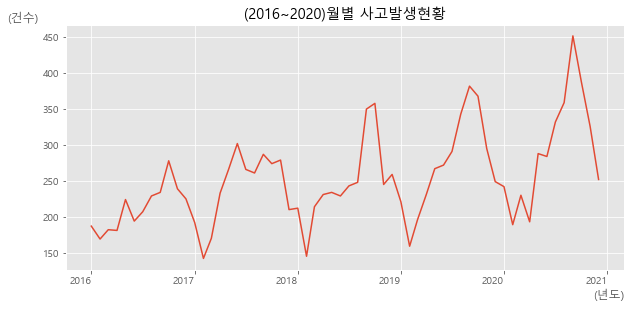

In [50]:
df['해양사고발생시간(월별)'].value_counts().plot()
plt.xticks(rotation=0)
plt.xlabel('(년도)', loc='right')
plt.ylabel('(건수)', loc='top', rotation=0)
plt.title('(2016~2020)월별 사고발생현황')
plt.show()

#계절성/추세 존재, 정상성 만족x

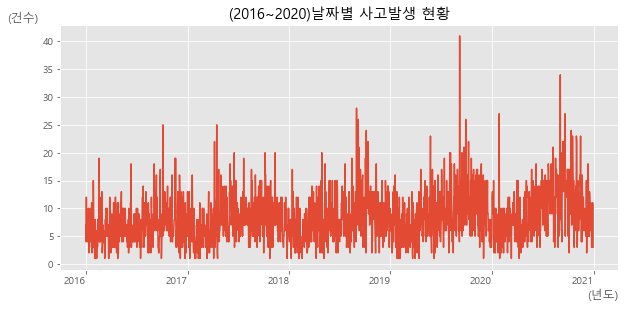

In [51]:
df['해양사고발생시간(일자)'].value_counts().plot()
plt.title('(2016~2020)날짜별 사고발생 현황')
plt.xticks(rotation=0)
plt.ylabel('(건수)', loc='top', rotation=0)
plt.xlabel('(년도)', loc='right')
plt.show()

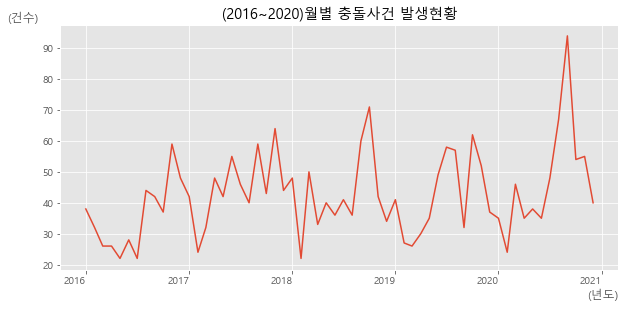

In [52]:
df[df['해양사고종류(통계용)'].str.contains('충돌')]['해양사고발생시간(월별)'].value_counts().plot()
plt.xticks(rotation=0)
plt.title('(2016~2020)월별 충돌사건 발생현황')
plt.xlabel('(년도)', loc='right')
plt.ylabel('(건수)', loc='top', rotation=0)
plt.show()